# Summary of Quantum Operations 

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

In [3]:
q = QuantumRegister(1)

-------

### 1. u gates

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


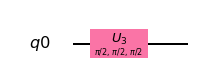

In [4]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw(output='mpl')

In [5]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions

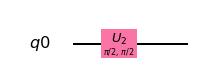

In [6]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
qc.draw(output='mpl')

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is a useful as it allows us to apply a quantum phase.

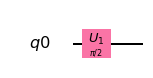

In [8]:
qc = QuantumCircuit(q)
qc.u1(pi/2,q)
qc.draw(output='mpl')

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

### Identity gate

The identity gate is $Id = u0(1)$.

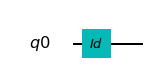

In [10]:
qc = QuantumCircuit(q)
qc.iden(q)
qc.draw(output='mpl')

In [11]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

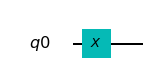

In [12]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw(output='mpl')

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j],
       [1.+0.j, 0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

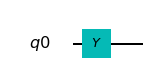

In [14]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw(output='mpl')

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

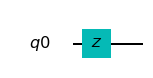

In [16]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw(output='mpl')

In [17]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

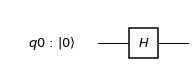

In [16]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw(output='mpl')

In [17]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

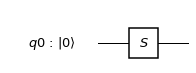

In [18]:
qc = QuantumCircuit(q)
qc.s(q)
qc.draw(output='mpl')

In [19]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


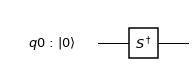

In [20]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw(output='mpl')

In [21]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

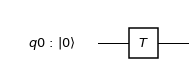

In [22]:
qc = QuantumCircuit(q)
qc.t(q)
qc.draw(output='mpl')

In [23]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-pi/4)
$$

They can be added as below.

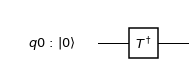

In [24]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw(output='mpl')

In [25]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

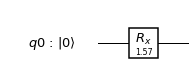

In [26]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw(output='mpl')

In [27]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.707+0.j   , 0.   -0.707j],
       [0.   -0.707j, 0.707+0.j   ]])

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

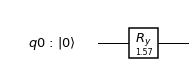

In [28]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw(output='mpl')

In [29]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note here we have used an equivalent as is different to u1 by global phase $e^{-i \phi/2}$.

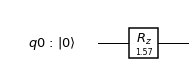

In [30]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw(output='mpl')

In [31]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

Note this is different due only to a global phase

--------------

In [88]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

UsageError: Line magic function `%qiskit_version_table` not found.


This code is a part of Qiskit
© Copyright IBM 2017, 2019.

This code is licensed under the Apache License, Version 2.0. You may
obtain a copy of this license in the LICENSE.txt file in the root directory
of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.